CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 이루어져 있습니다. 데이터셋의 각 이미지는 10개의 클래스로 라벨링되어 있으며, 머신러닝 연구에 가장 널리 사용되고 있습니다.

#데이터 로드 및 전처리
CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [3]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# CIFAR-10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터에서 20%를 검증 데이터로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 데이터와 레이블 크기 출력

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [4]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

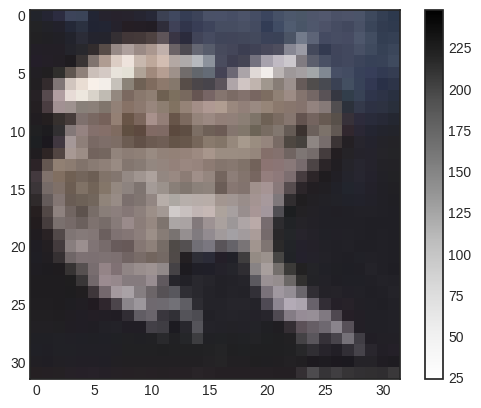

In [6]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-v0_8-white')

plt.figure()
plt.imshow(x_train[0])# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
plt.colorbar()
plt.show()

In [7]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

In [8]:
# 32x32x3 = 3072 형태로 변형
x_train = x_train.reshape(x_train.shape[0], 32 * 32 * 3)
x_val = x_val.reshape(x_val.shape[0], 32 * 32 * 3)
x_test = x_test.reshape(x_test.shape[0], 32 * 32 * 3)


In [15]:
from tensorflow.keras.utils import to_categorical

# 레이블을 원-핫 인코딩으로 변환
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [16]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [17]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

#모델 구성 및 컴파일
BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [18]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(3072,), name='input'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(256, activation='relu', name='hidden1'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu', name='hidden2'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax', name='output')  # CIFAR-10: 10개 클래스
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,742,474 (6.65 MB)

 Trainable params: 1,740,682 (6.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

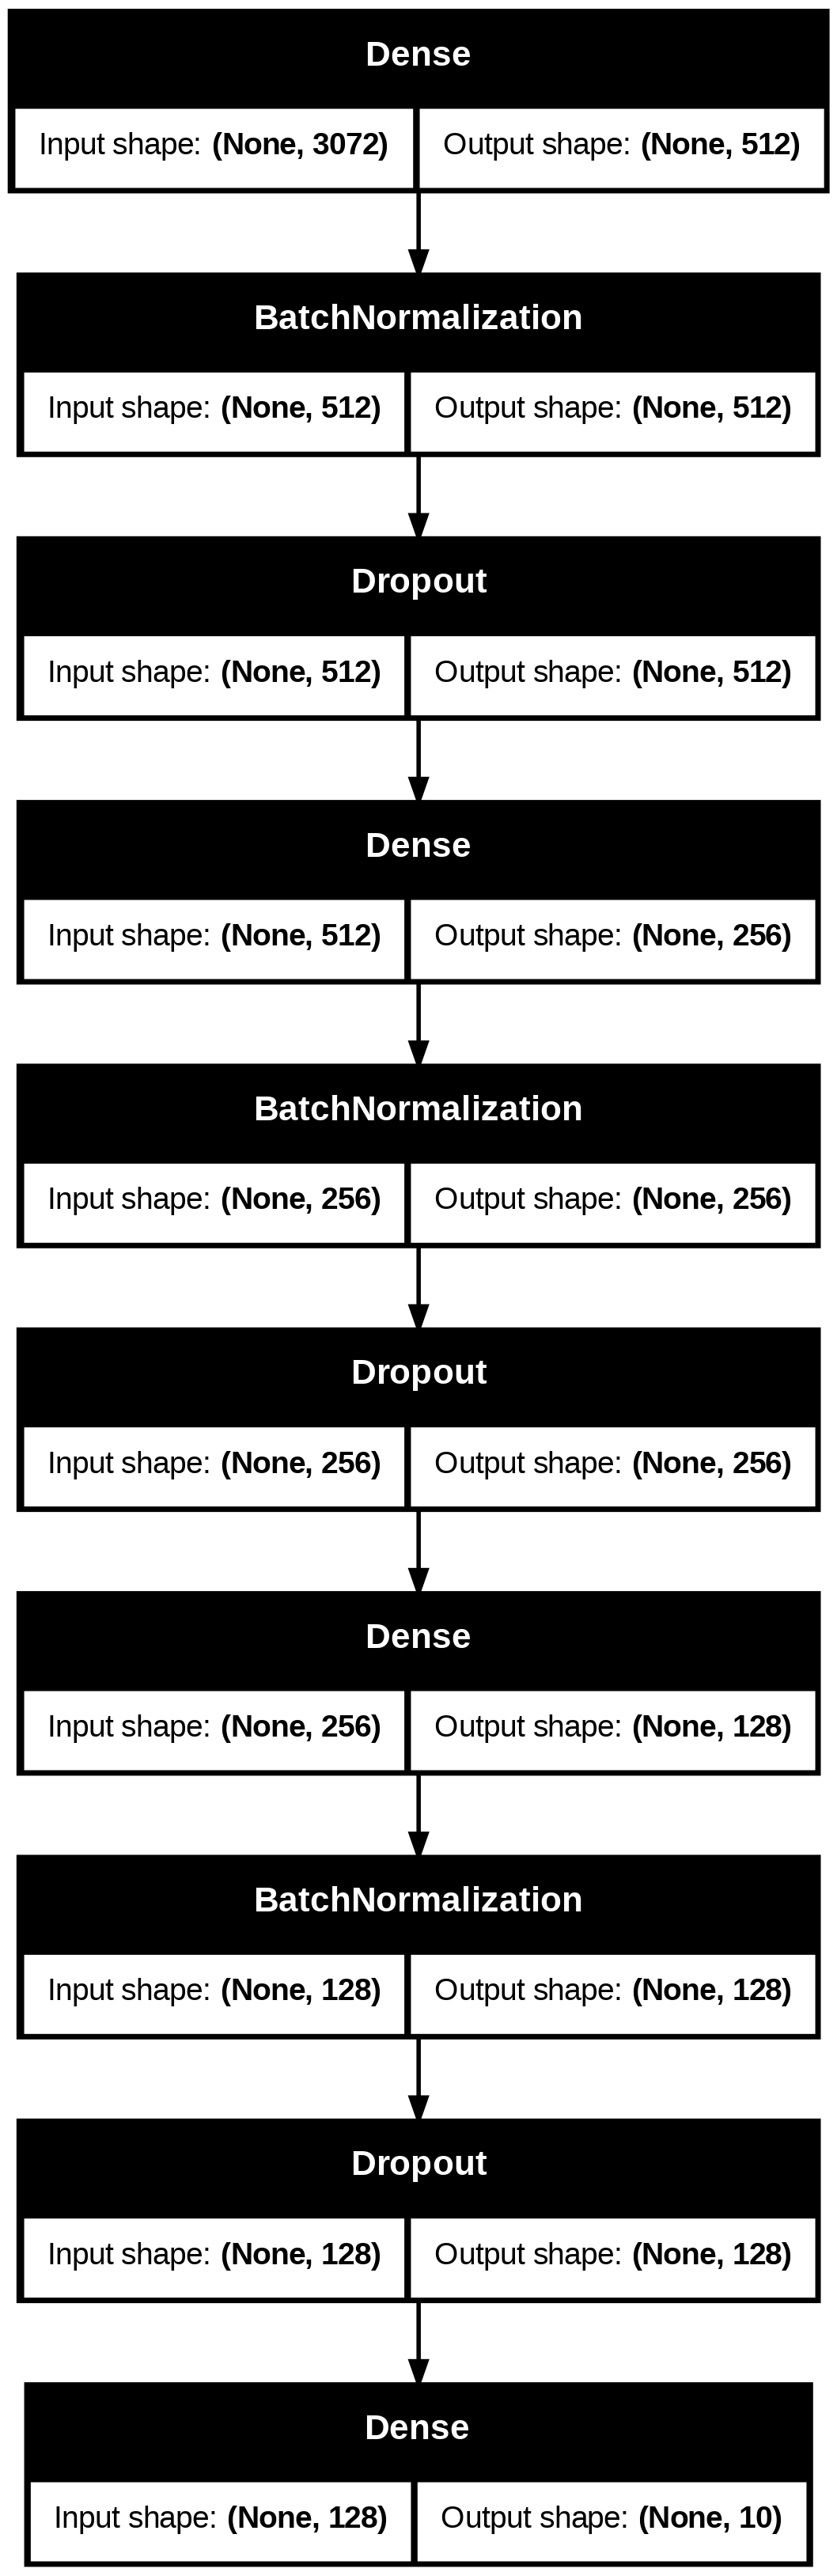

In [20]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

#모델 학습
ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [21]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 콜백 설정
checkpoint_cb = ModelCheckpoint('best_cifar_model.h5', save_best_only=True, monitor='val_loss', mode='min')
earlystop_cb = EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss', mode='min')

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, earlystop_cb])


Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1963 - loss: 2.6241

625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - accuracy: 0.1964 - loss: 2.6236 - val_accuracy: 0.3314 - val_loss: 1.8989
Epoch 2/100
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3123 - loss: 1.8982

625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 32ms/step - accuracy: 0.3123 - loss: 1.8981 - val_accuracy: 0.3765 - val_loss: 1.7321
Epoch 3/100
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3489 - loss: 1.8063

625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.3490 - loss: 1.8063 - val_accuracy: 0.3935 - val_loss: 1.6819
Epoch 4/100
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3678 - loss: 1.7564

625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.3678 - loss: 1.7564 - val_accuracy: 0.4018 - val_loss: 1.6469
Epoch 5/100
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3852 - loss: 1.7260

625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.3852 - loss: 1.7260 - val_accuracy: 0.4123 - val_loss: 1.6304
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3875 - loss: 1.7117

625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.3875 - loss: 1.7117 - val_accuracy: 0.4099 - val_loss: 1.6243
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.3935 - loss: 1.6944 - val_accuracy: 0.3988 - val_loss: 1.6818
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3983 - loss: 1.6785

625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 36ms/step - accuracy: 0.3983 - loss: 1.6786 - val_accuracy: 0.4463 - val_loss: 1.5523
Epoch 9/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.4023 - loss: 1.6664 - val_accuracy: 0.4356 - val_loss: 1.5557
Epoch 10/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.4067 - loss: 1.6658 - val_accuracy: 0.4357 - val_loss: 1.5943
Epoch 11/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.4145 - loss: 1.6511 - val_accuracy: 0.4249 - val_loss: 1.5866
Epoch 12/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 0.4151 - loss: 1.6408 - val_accuracy: 0.4321 - val_loss: 1.5738
Epoch 13/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4230 - loss: 1.6304

625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.4230 - loss: 1.6304 - val_accuracy: 0.4473 - val_loss: 1.5214
Epoch 14/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.4228 - loss: 1.6272 - val_accuracy: 0.4278 - val_loss: 1.5812
Epoch 15/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.4265 - loss: 1.6130 - val_accuracy: 0.4353 - val_loss: 1.5659
Epoch 16/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.4208 - loss: 1.6174 - val_accuracy: 0.4518 - val_loss: 1.5315
Epoch 17/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.4273 - loss: 1.6048 - val_accuracy: 0.4473 - val_loss: 1.5460
Epoch 18/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.4303 - loss: 1.6098 - val_accuracy: 0.4507 - val_loss: 1.5338
Epoch 19/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4301 - loss: 1.5992

625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.4301 - loss: 1.5992 - val_accuracy: 0.4599 - val_loss: 1.4879
Epoch 20/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 32ms/step - accuracy: 0.4318 - loss: 1.5898 - val_accuracy: 0.4262 - val_loss: 1.5905
Epoch 21/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.4326 - loss: 1.5905 - val_accuracy: 0.4490 - val_loss: 1.5306
Epoch 22/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.4315 - loss: 1.5936 - val_accuracy: 0.4443 - val_loss: 1.5404
Epoch 23/100
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4351 - loss: 1.5812

625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.4351 - loss: 1.5812 - val_accuracy: 0.4719 - val_loss: 1.4785
Epoch 24/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.4387 - loss: 1.5785 - val_accuracy: 0.4658 - val_loss: 1.4892
Epoch 25/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.4394 - loss: 1.5727 - val_accuracy: 0.4524 - val_loss: 1.5230
Epoch 26/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4452 - loss: 1.5657

625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.4452 - loss: 1.5657 - val_accuracy: 0.4707 - val_loss: 1.4663
Epoch 27/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.4426 - loss: 1.5637 - val_accuracy: 0.4608 - val_loss: 1.4856
Epoch 28/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.4456 - loss: 1.5591 - val_accuracy: 0.4626 - val_loss: 1.4870
Epoch 29/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.4496 - loss: 1.5527 - val_accuracy: 0.4453 - val_loss: 1.5299
Epoch 30/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 36ms/step - accuracy: 0.4463 - loss: 1.5442 - val_accuracy: 0.4651 - val_loss: 1.4900
Epoch 31/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.4482 - loss: 1.5514 - val_accuracy: 0.4710 - val_loss: 1.4665
Epoch 32/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.4522 - loss: 1.5439 - val_accuracy: 0.4593 - val_loss: 1.5112
Epoch 33/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.4483 - loss: 1.5484

학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

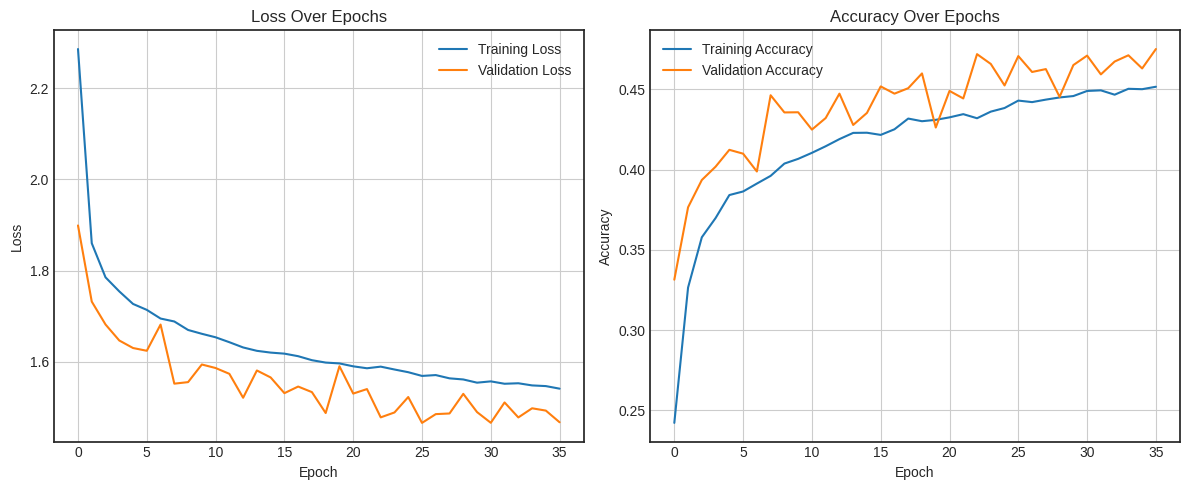

In [23]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import matplotlib.pyplot as plt

# 손실(loss) 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 정확도(accuracy) 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#모델 평가 및 예측
테스트 데이터셋을 이용해 모델을 평가합니다.

In [24]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4730 - loss: 1.4530


[1.456506609916687, 0.4749999940395355]

사실 지금까지 배운 Dense Layer만 활용해서는 이번 프로젝트에서 높은 accuracy를 얻기는 힘듭니다. 이미지 데이터를 다루기 위해서는 이미지에 적합한 CNN(Convolution Neural Network) 계열의 모델을 사용해야 합니다. CNN에 대한 내용은 Computer Vision 과정을 통해 더 배울 수 있습니다.